In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("data/clean_data.csv")
del df["Unnamed: 0"]

In [5]:
target = 'water_temperature'
X = df.drop(target, axis=1)
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
mapper = DataFrameMapper([
    ("beach_name", LabelBinarizer()),
    (['turbidity'], StandardScaler()),
    (['wave_height'], StandardScaler()),
    (['wave_period'], StandardScaler()),
    (['battery_life'], StandardScaler()),
    ('time_of_day', LabelBinarizer()),
    (['month'], StandardScaler()),
    (['day'], StandardScaler()),
    (['year'], StandardScaler())],df_out=True)

In [8]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [9]:
model = Sequential([
    Input(shape=(Z_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(.05),
    Dense(32, activation='elu'),
    Dropout(.05),
    Dense(16, activation='relu'),
    Dropout(.02),
    Dense(1, activation='elu')
])

model.compile(loss='mae', optimizer='adam')

history = model.fit(Z_train, y_train,
                    validation_data=(Z_test, y_test),
                    epochs=200, batch_size=32,
                    verbose=2)

Train on 26017 samples, validate on 8673 samples
Epoch 1/200
26017/26017 - 2s - loss: 3.5149 - val_loss: 1.6486
Epoch 2/200
26017/26017 - 2s - loss: 1.9557 - val_loss: 1.5004
Epoch 3/200
26017/26017 - 2s - loss: 1.8532 - val_loss: 1.4842
Epoch 4/200
26017/26017 - 2s - loss: 1.7677 - val_loss: 1.3262
Epoch 5/200
26017/26017 - 2s - loss: 1.7001 - val_loss: 1.2737
Epoch 6/200
26017/26017 - 2s - loss: 1.6293 - val_loss: 1.2025
Epoch 7/200
26017/26017 - 2s - loss: 1.5929 - val_loss: 1.1674
Epoch 8/200
26017/26017 - 2s - loss: 1.5668 - val_loss: 1.1296
Epoch 9/200
26017/26017 - 2s - loss: 1.5289 - val_loss: 1.1393
Epoch 10/200
26017/26017 - 2s - loss: 1.4981 - val_loss: 1.0786
Epoch 11/200
26017/26017 - 2s - loss: 1.4691 - val_loss: 1.0885
Epoch 12/200
26017/26017 - 2s - loss: 1.4567 - val_loss: 1.1260
Epoch 13/200
26017/26017 - 2s - loss: 1.4465 - val_loss: 1.0486
Epoch 14/200
26017/26017 - 2s - loss: 1.4253 - val_loss: 1.0466
Epoch 15/200
26017/26017 - 2s - loss: 1.4096 - val_loss: 1.0547


Epoch 128/200
26017/26017 - 2s - loss: 0.9378 - val_loss: 0.7801
Epoch 129/200
26017/26017 - 2s - loss: 0.9310 - val_loss: 0.7630
Epoch 130/200
26017/26017 - 2s - loss: 0.9287 - val_loss: 0.7744
Epoch 131/200
26017/26017 - 2s - loss: 0.9303 - val_loss: 0.8219
Epoch 132/200
26017/26017 - 2s - loss: 0.9319 - val_loss: 0.7682
Epoch 133/200
26017/26017 - 2s - loss: 0.9294 - val_loss: 0.7725
Epoch 134/200
26017/26017 - 2s - loss: 0.9324 - val_loss: 0.8072
Epoch 135/200
26017/26017 - 2s - loss: 0.9240 - val_loss: 0.7744
Epoch 136/200
26017/26017 - 2s - loss: 0.9277 - val_loss: 0.7649
Epoch 137/200
26017/26017 - 2s - loss: 0.9253 - val_loss: 0.7664
Epoch 138/200
26017/26017 - 2s - loss: 0.9272 - val_loss: 0.7717
Epoch 139/200
26017/26017 - 2s - loss: 0.9235 - val_loss: 0.7902
Epoch 140/200
26017/26017 - 2s - loss: 0.9133 - val_loss: 0.7607
Epoch 141/200
26017/26017 - 2s - loss: 0.9135 - val_loss: 0.7645
Epoch 142/200
26017/26017 - 2s - loss: 0.9169 - val_loss: 0.7576
Epoch 143/200
26017/26017

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

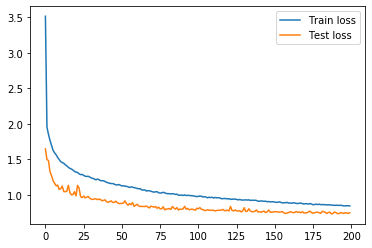

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [12]:
history.history

{'loss': [3.514857850443342,
  1.9557349775418214,
  1.8531850474726692,
  1.7677052708231487,
  1.7001377810530884,
  1.6292628116243306,
  1.5929025257880514,
  1.5668188178594717,
  1.5288879354063232,
  1.4981131720983694,
  1.4690718805688685,
  1.4566982410925176,
  1.4464692884346146,
  1.4253354955059525,
  1.4096429958769447,
  1.3901726528111569,
  1.3742234215049276,
  1.3655932836594542,
  1.3510917805505531,
  1.3338402120816963,
  1.3205625414046482,
  1.3183154147084681,
  1.2982152673527991,
  1.2871156051321382,
  1.2891897908335495,
  1.27729813110619,
  1.2641847036223648,
  1.2612611258401536,
  1.2634841542710036,
  1.2517766740644043,
  1.241179325525888,
  1.2339558982050025,
  1.2248852547214752,
  1.21395093687135,
  1.225408229160012,
  1.2153010034229421,
  1.2030035318692147,
  1.2013134318365417,
  1.2011936103215832,
  1.1896126486838412,
  1.1787698503579231,
  1.17277161001119,
  1.1650034558485751,
  1.1612350765031356,
  1.160897953200451,
  1.15340728

In [13]:
results = model.evaluate(Z_test, y_test, batch_size=32)

8673/8673 [==============================] - 0s 33us/sample - loss: 0.7508
